In [1]:
!pip install gensim

In [2]:
import requests
import re

def load_texts(url_list):
    corpus = []

    for url in url_list:
        try:
            response = requests.get(url)
            response.raise_for_status()
            text = response.text

            # Use regex to find the start and end of the actual book content
            start_match = re.search(r'\*\*\* *START.*?\n', text, re.IGNORECASE)
            end_match = re.search(r'\*\*\* *END.*?\n', text, re.IGNORECASE)

            if start_match and end_match:
                text = text[start_match.end():end_match.start()]
            else:
                print(f"Could not find START/END markers in {url}, using full text.")

            # Clean the text: remove non-letters, normalize whitespace
            cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
            cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
            corpus.append(cleaned_text.strip())

        except requests.RequestException as e:
            print(f"Failed to fetch {url}: {e}")
            continue

    return corpus

In [21]:
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"
]
texts = load_texts(urls)
print(texts[0][:200])  # Print first 500 characters of the first cleaned text
print(texts[1][:200])
print(texts[0][:200])


Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tal
Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arranged before commencement of game WHITE RED PIECES PAWNS PAWNS PI
Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole CHAPTER II The Pool of Tears CHAPTER III A CaucusRace and a Long Tal


3. Tokenize the text and print the first 150 tokens of each book



In [22]:
import gensim

tokenized_books= []

for i, book in enumerate(texts):
  tokens = gensim.utils.simple_preprocess (book)
  tokenized_books.append(tokens)
  print(f"\nBook {i+1} - First 50 tokens:")
  print(tokenized_books[i][:50])


Book 1 - First 50 tokens:
['illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'caucusrace', 'and', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'little', 'bill', 'chapter', 'advice', 'from', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'mad', 'teaparty']

Book 2 - First 50 tokens:
['illustration', 'through', 'the', 'lookingglass', 'and', 'what', 'alice', 'found', 'there', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'dramatis', 'person', 'as', 'arranged', 'before', 'commencement', 'of', 'game', 'white', 'red', 'pieces', 'pawns', 'pawns', 'pieces', 'tweedledee', 'daisy', 'daisy', 'humpty', 'dumpty', 'unicorn', 'haigha', 'messenger', 'carpenter', 'sheep', 'oyster', 'oyster', 'walrus', 'queen', 'lily', 'tigerlily', 'queen', 

4. Remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for i, book in enumerate(tokenized_books):
    tokenized_books[i] = [token for token in book if token not in stop_words]
    print(f"\nBook {i+1} - First 50 tokens:")
    print(tokenized_books[i][:50])


Book 1 - First 50 tokens:
['illustration', 'alices', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucusrace', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparty', 'chapter', 'viii', 'queens', 'croquetground', 'chapter', 'ix', 'mock', 'turtles', 'story', 'chapter', 'lobster', 'quadrille']

Book 2 - First 50 tokens:
['illustration', 'lookingglass', 'alice', 'found', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'dramatis', 'person', 'arranged', 'commencement', 'game', 'white', 'red', 'pieces', 'pawns', 'pawns', 'pieces', 'tweedledee', 'daisy', 'daisy', 'humpty', 'dumpty', 'unicorn', 'haigha', 'messenger', 'carpenter', 'sheep', 'oyster', 'oyster', 'walrus', 'queen', 'lily', 'tigerlily', 'queen', 'king', 'fawn', 'rose', 'king', '

5. Using PorterStemmer(), print the first 50 stemmed tokens

In [26]:
# import these modules
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_books=[]
for i, book in enumerate(tokenized_books):
    stemmed_books.append([ps.stem(token) for token in book])
    print(f"\nBook {i+1} - First 50 tokens:")
    print(stemmed_books[i][:50])


Book 1 - First 50 tokens:
['illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground', 'chapter', 'ix', 'mock', 'turtl', 'stori', 'chapter', 'lobster', 'quadril']

Book 2 - First 50 tokens:
['illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'queen', 'lili', 'tigerlili', 'queen', 'king', 'fawn', 'rose', 'king', 'age', 'man', 'oyster', 'oyster', 'crow', 'knight', 'hatta

6. Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute.

In [73]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

lemmatized_books= []
# Process each book and print first 50 lemmatized tokens
for i, book in enumerate(texts):
    doc = nlp(book)

    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    lemmatized_books.append(lemmas)

    print(f"\nBook {i+1} - First 50 lemmatized tokens:")
    print(lemmas[:50])



Book 1 - First 50 lemmatized tokens:
['Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'chapter', 'IV', 'Rabbit', 'send', 'Little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'TeaParty', 'chapter', 'VIII', 'Queens', 'CroquetGround', 'chapter', 'IX', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X']

Book 2 - First 50 lemmatized tokens:
['illustration', 'lookingglass', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster', 'Oyster', 'Walrus', 'W', 'Queen', 'Lily', 'Tigerlily', 'R', 'Queen', 'W', 'King', 'Fawn',

8. Using NLTK, identify POS tags of each text.

In [48]:
import nltk

nltk.download('punkt', force= True)                      # For word_tokenize()
nltk.download('averaged_perceptron_tagger_eng') # For pos_tag()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [72]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag

tokenizer = TreebankWordTokenizer()
postag= []

for i, book in enumerate(texts):
    tokens = tokenizer.tokenize(book)  # test on partial text first
    postag.append(pos_tag(tokens))
    print(f"\nBook {i+1} - First 50 POS-tagged tokens:")
    print(postag[i][:50])



Book 1 - First 50 POS-tagged tokens:
[('Illustration', 'NN'), ('Alices', 'NNS'), ('Adventures', 'VBZ'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('THE', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NN'), ('I', 'PRP'), ('Down', 'RP'), ('the', 'DT'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('The', 'DT'), ('Pool', 'NNP'), ('of', 'IN'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('A', 'NNP'), ('CaucusRace', 'NNP'), ('and', 'CC'), ('a', 'DT'), ('Long', 'JJ'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('The', 'DT'), ('Rabbit', 'NNP'), ('Sends', 'NNPS'), ('in', 'IN'), ('a', 'DT'), ('Little', 'JJ'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('from', 'IN'), ('a', 'DT'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP')]

Book 2 - First 50 POS-tagged tokens:
[('Illustration', 'NNP'), ('THROUGH', 'NN

9. Using NLTK identify all the entities of each text

In [60]:
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')



[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [66]:
from nltk import ne_chunk

named_entities= []
for i, tagged in enumerate(postag):
  named_entities.append(ne_chunk(tagged))
  print(named_entities[i][:50])

[Tree('GPE', [('Illustration', 'NN')]), Tree('ORGANIZATION', [('Alices', 'NNS'), ('Adventures', 'VBZ')]), ('in', 'IN'), Tree('GPE', [('Wonderland', 'NNP')]), ('by', 'IN'), Tree('PERSON', [('Lewis', 'NNP'), ('Carroll', 'NNP'), ('THE', 'NNP')]), Tree('ORGANIZATION', [('MILLENNIUM', 'NNP')]), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NN'), ('I', 'PRP'), ('Down', 'RP'), ('the', 'DT'), Tree('ORGANIZATION', [('RabbitHole', 'NNP')]), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('The', 'DT'), Tree('ORGANIZATION', [('Pool', 'NNP')]), ('of', 'IN'), Tree('PERSON', [('Tears', 'NNP')]), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('A', 'NNP'), Tree('ORGANIZATION', [('CaucusRace', 'NNP')]), ('and', 'CC'), ('a', 'DT'), Tree('ORGANIZATION', [('Long', 'JJ'), ('Tale', 'NNP')]), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('The', 'DT'), Tree('ORGANIZATION', [('Rabbit', 'NNP'), ('Sends', 'NNPS')]), ('in', 'IN'), ('a', 'DT'), ('Little', 'JJ'), Tree('PERSON', [('Bill', 'NNP')]), ('CHAPTER', 'NNP'), ('

Using wordcloud and matplotlib, display a word cloud of each book.

In [67]:
!pip install wordcloud matplotlib

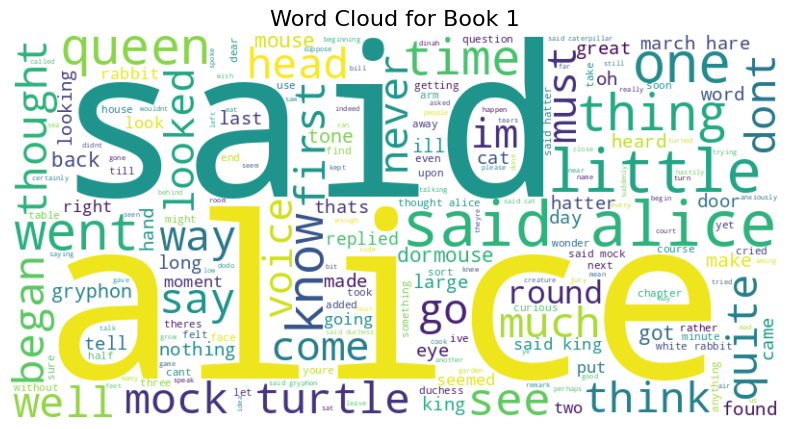

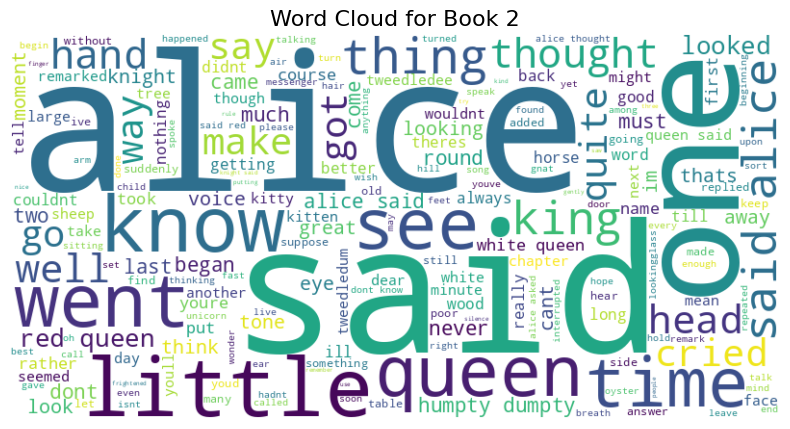

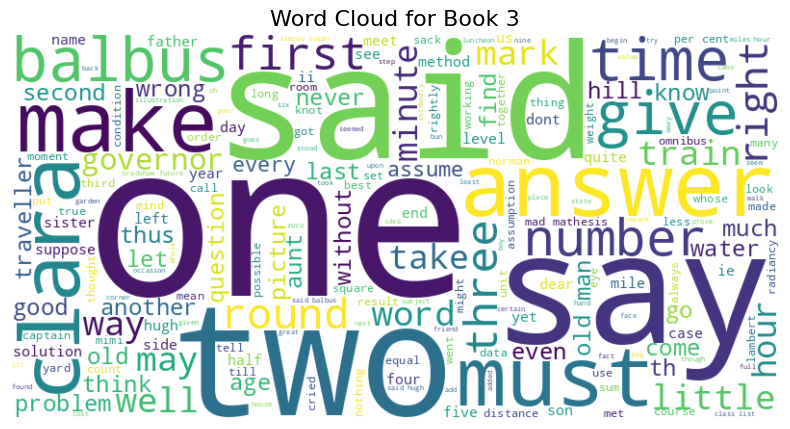

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, book in enumerate(tokenized_books):
  # Combine all tokens of the first book into one string
  text = ' '.join(book)  # You can change the index for other books

  # Create and display the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # No axes
  plt.title(f"Word Cloud for Book {i+1}", fontsize=16)
  plt.show()
  text = []

2. Use BoW method to check the five most frequent words in all the books

In [75]:
from collections import Counter

# Flatten the list of all lemmatized tokens from all books
all_lemmas = [lemma for book in lemmatized_books for lemma in book]

# Count frequencies
freq_dist = Counter(all_lemmas)

# Get top 5 most frequent words
top_five = freq_dist.most_common(5)

# Print result
print("Top 5 most frequent lemmatized words across all books:")
for word, count in top_five:
    print(f"{word}: {count}", {all_lemas})

Top 5 most frequent lemmatized words across all books:
say: 1152
Alice: 827
not: 606
think: 302
go: 301


3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert token lists into lemmatized text strings (one per book)
docs = [' '.join(book) for book in lemmatized_books]

# Create BoW model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)  # This is a sparse matrix

# Map word indices back to actual words
vocab = vectorizer.get_feature_names_out()

# Loop through non-zero entries of the sparse matrix
for doc_id, word_id in zip(*X.nonzero()):
    count = X[doc_id, word_id]
    print(f"Document {doc_id} | Word index {word_id} ('{vocab[word_id]}') | Count: {count}")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Document 1 | Word index 5278 ('wrap') | Count: 1
Document 1 | Word index 664 ('carefully') | Count: 5
Document 1 | Word index 3793 ('remark') | Count: 41
Document 1 | Word index 3000 ('move') | Count: 4
Document 1 | Word index 2873 ('mention') | Count: 3
Document 1 | Word index 2716 ('lonely') | Count: 1
Document 1 | Word index 1792 ('footstep') | Count: 1
Document 1 | Word index 1970 ('goodnaturedly') | Count: 1
Document 1 | Word index 2252 ('hunt') | Count: 2
Document 1 | Word index 5025 ('vanish') | Count: 3
Document 1 | Word index 900 ('completely') | Count: 1
Document 1 | Word index 1837 ('frightened') | Count: 11
Document 1 | Word index 3455 ('point') | Count: 8
Document 1 | Word index 2940 ('mistake') | Count: 1
Document 1 | Word index 2151 ('hell') | Count: 1
Document 1 | Word index 3061 ('neat') | Count: 2
Document 1 | Word index 537 ('brass') | Count: 1
Document 1 | Word index 3423 ('plate') | Count

4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

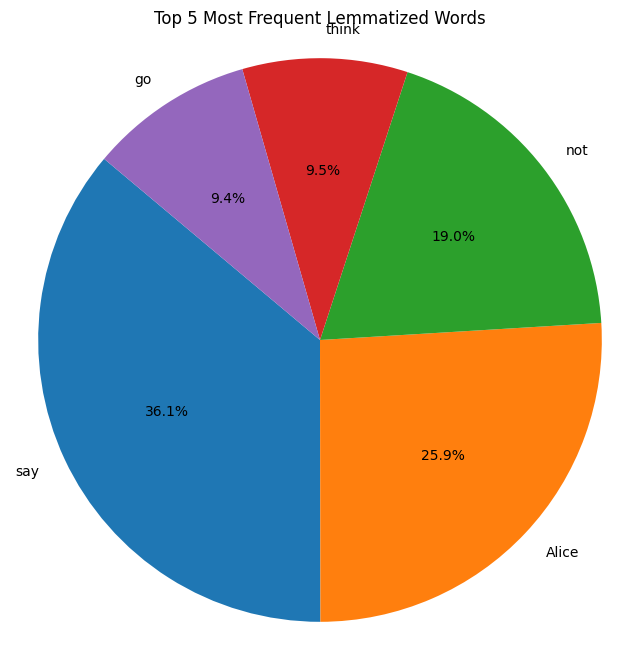

In [79]:
# Separate words and their counts
labels = [word for word, count in top_five]
sizes = [count for word, count in top_five]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Frequent Lemmatized Words")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()


1. Create another BoW, now using TF-IDF as vectorizer.

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare documents: lemmatized, stopword-removed tokens → text
docs = [' '.join(book) for book in lemmatized_books]

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)

# Transform text data
X_tfidf = tfidf_vectorizer.fit_transform(docs)

# Get vocabulary
vocab = tfidf_vectorizer.get_feature_names_out()

2. Create again the pie plots with the new 5 most relevant words from each document.





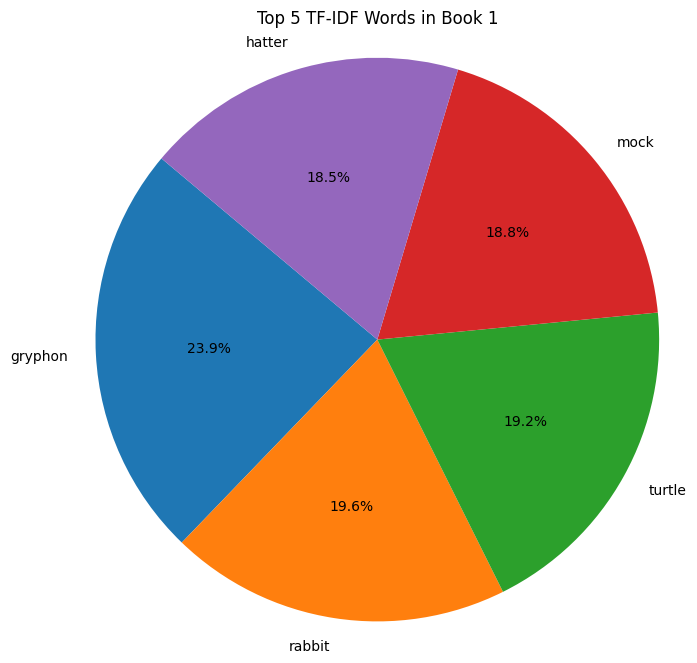

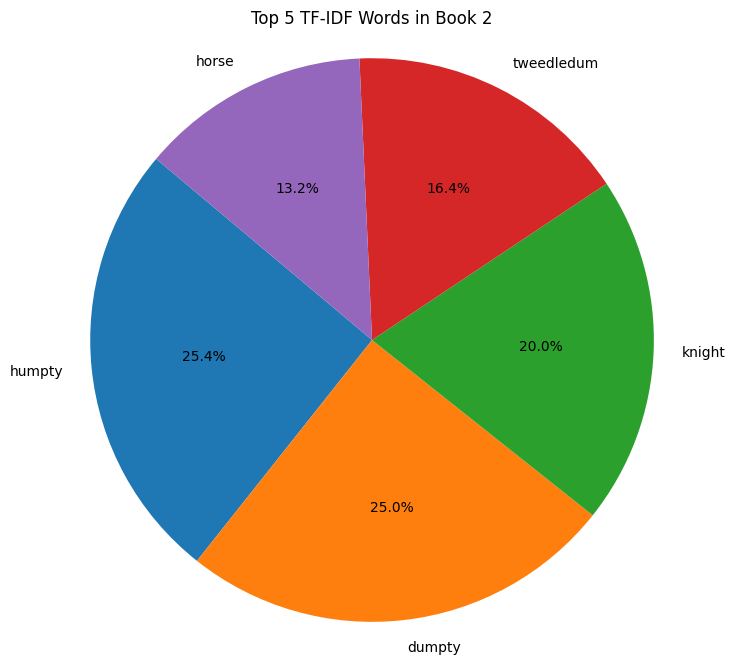

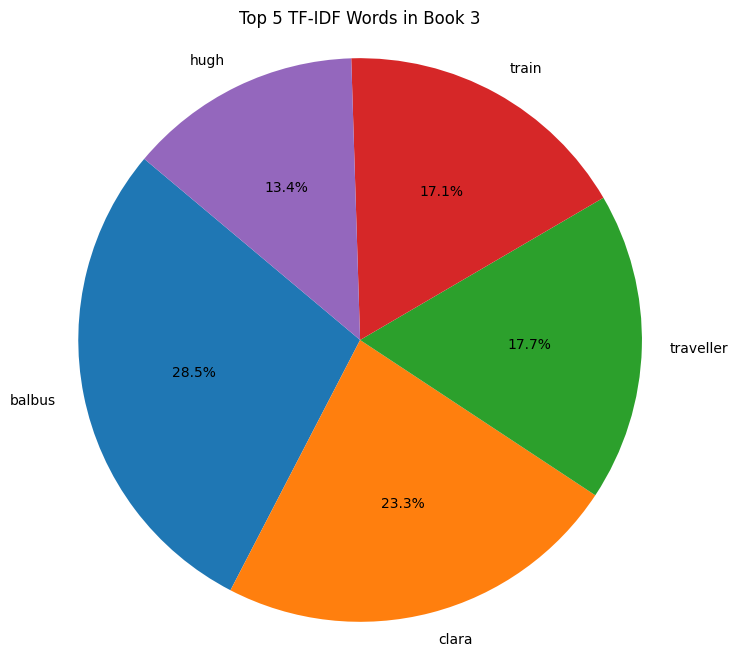

In [87]:
import numpy as np

for i, book in enumerate(X_tfidf):
  # Get the TF-IDF vector for that book
  row = book.toarray().flatten()

  # Get top 5 word indices
  top_indices = np.argsort(row)[-5:][::-1]

  # Get words and scores
  labels = [tfidf_vectorizer.get_feature_names_out()[j] for j in top_indices]
  sizes = [row[j] for j in top_indices]

  # Plot
  plt.figure(figsize=(8, 8))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
  plt.title(f"Top 5 TF-IDF Words in Book {i + 1}")
  plt.axis('equal')
  plt.show()
